# Week4授業前課題1 アヤメの分類

## 【課題1】練習のために特徴量とカテゴリを選択

|Attribute	    |説明       |
|:--------------|:-----------|
|sepal length	|ガクの長さ |
|sepal width	|ガクの幅   |
|petal length	|花弁の長さ |
|petal width	|花弁の幅   |

In [495]:
from sklearn.datasets import load_iris

# アヤメセットを読み込む
iris_data = load_iris()

In [496]:
import pandas as pd

# 説明変数
df_X = pd.DataFrame(iris_data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df_X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [497]:
# 目的変数
df_y = pd.DataFrame(iris_data.target, columns=["species"])
df_y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [498]:
df = pd.concat([df_X, df_y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [499]:
data = df.loc[:,["sepal_length","petal_length","species"]][df["species"] != 0]
data

,sepal_length,petal_length,species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## 【問題2】データの分析

Text(0.5, 1.0, 'petal length')

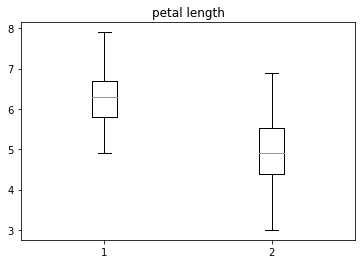

In [500]:
import matplotlib.pyplot as plt
%matplotlib inline

# 箱ひげ図の描画
plt.boxplot([data["sepal_length"], data["petal_length"]], labels=data["species"].value_counts(sort=False).index)
plt.title("petal length")

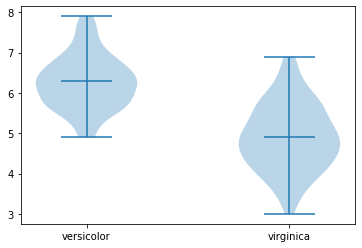

In [501]:
# バイオリン図を描画
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.violinplot([data["sepal_length"], data["petal_length"]], showmedians=True)
ax.set_xticks(data["species"].value_counts(sort=False).index)
ax.set_xticklabels([iris_data.target_names[1], iris_data.target_names[2]])
plt.show()

## 【問題3】前処理・訓練データと検証データの分割

In [502]:
import numpy as np
# ndarrayへ変換
X = np.array(data.iloc[:,0:2])
y = np.array(data.iloc[:,2])

In [503]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

全データ数が100件なので、  
訓練データ：75件  
検証データ：25件  
の配分になる

In [504]:
print(type(X_train))
X_train.shape

<class 'numpy.ndarray'>


(75, 2)

In [505]:
print(type(y_train))
y_train.shape

<class 'numpy.ndarray'>


(75,)

In [506]:
print(type(X_test))
X_test.shape

<class 'numpy.ndarray'>


(25, 2)

In [507]:
print(type(y_test))
y_test.shape

<class 'numpy.ndarray'>


(25,)

## 【問題4】前処理・標準化

In [508]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler_X_train = scaler.transform(X_train)
scaler_X_test = scaler.transform(X_test)


## 【問題5】学習と推定

In [509]:
from sklearn.neighbors import KNeighborsClassifier
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(scaler_X_train, y_train)

neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(scaler_X_train, y_train)

neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(scaler_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [510]:
# 標準化済みのX_testで予測を行う。
y_pred = neigh5.predict(scaler_X_test)
y_pred

array([2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2])

In [511]:
# 正解データとの比較
y_test

array([2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2])

## 【問題6】評価

### scikit-learnを使い4種類の指標を計算する

In [512]:
# Accuracy（正解率）の算出
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy（正解率）:{}".format(accuracy_score(y_test, y_pred)))
print("Precision（適合率）:{}".format(precision_score(y_test, y_pred)))
print("Recall（再現率）:{}".format(recall_score(y_test, y_pred)))
print("F値:{}".format(f1_score(y_test, y_pred)))

Accuracy（正解率）:0.92
Precision（適合率）:0.9230769230769231
Recall（再現率）:0.9230769230769231
F値:0.9230769230769231


In [513]:
# まとめる
import pandas as pd
from sklearn.metrics import classification_report
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr = classification_report(y_test, y_pred, target_names = target_names, output_dict=True)
print(cr)

# pandas.DataFrameへ変換
df_cr = pd.DataFrame(cr)
df_cr

{'versicolor': {'precision': 0.9230769230769231, 'recall': 0.9230769230769231, 'f1-score': 0.9230769230769231, 'support': 13}, 'virginica': {'precision': 0.9166666666666666, 'recall': 0.9166666666666666, 'f1-score': 0.9166666666666666, 'support': 12}, 'accuracy': 0.92, 'macro avg': {'precision': 0.9198717948717949, 'recall': 0.9198717948717949, 'f1-score': 0.9198717948717949, 'support': 25}, 'weighted avg': {'precision': 0.92, 'recall': 0.92, 'f1-score': 0.92, 'support': 25}}


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00


support欄はデータ件数で、検証データ25件の内、versicolorが13件、virginicaが12件だった事を示している。

### 混同行列をscikit-learnを使い表示する

In [514]:
from sklearn.metrics import confusion_matrix
# Confution Matrix作成
confusion_m = confusion_matrix(y_test, y_pred)
confusion_m

array([[12,  1],
       [ 1, 11]], dtype=int64)

### 4種類の指標値の意味について簡単に調査して文章でまとめる

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/70152/29cc37e7-ff2e-d781-d4a4-e328fd7526a1.png)

今回の例では、versicolorをPositive、virginicaをNegativeとすると、  
正解がversicolor(Positive)であり、versicolor(Positive)と正しく予想できたもの(TP)が13件、  
正解がversicolor(Positive)であり、virginica(Negative)と間違えて予想したもの(FN)が1件、  
正解がvirginica(Negative)であり、versicolor(Positive)と間違えて予想したもの(FP)が4件、   
正解がvirginica(Negative)であり、virginica(Negative)と正しく予想できたもの(TN)が7件、 
となる。

#### <Accuracy（正解率）について>  
全データの中で正しく分類できたTP,TNがどれだけあるかという指標であり、高いほど性能がよい。  
$$
Accuracy = \frac{TP + TN}{TP + FP + FN + TN}
$$

今回の場合、  
$$
Accuracy = \frac{12 + 11}{12 + 1 + 1 + 11} = \frac{23}{25} = 0.92
$$


#### <Precision（適合率）について>
Positive と分類されたデータ(TP + FP)の中で実際にPositiveだったデータ(TP)数の割合。  
この値が高いほど性能が良く、間違った分類が少ないということを意味する。
$$
Presision = \frac{TP}{TP + FP}
$$

新型コロナウィルスのPCR検査を例とすると、<font color="Red">「陽性」</font>と判断された内、本当に新型コロナに<font color="Red">罹患している率</font>となる。  
この場合、本当は罹患していないが、「陽性」と判定された人も含めた中での本当の罹患者という意味になる。

今回の場合、
$$
Presision = \frac{12}{12 + 1} = \frac{12}{13} ≒ 0.923
$$


#### <Recall（再現率）について>
Positiveなデータを取りこぼし無く、正しくPositiveと推測できているかどうか。  
この値が高いほど性能がよく、間違ったPositiveの判断が少ないということ。
別の言い方をすれば本来Positiveと推測すべき全データの内、どれほど回収できたかという指標。
$$
Presision = \frac{TP}{TP + FN}
$$

新型コロナウィルスのPCR検査を例とすると、新型コロナに<font color="Red">罹患している内、</font>正しく<font color="Red">「陽性」</font>と判断出来た率となる。  
この値が小さいと判定漏れが多く、他の人にウイルスをばらまく状況となる。


今回の場合、
$$
Presision = \frac{12}{12 + 1} = \frac{12}{13} = 0.923
$$


#### <F値について>
上記のPrecision（適合率）とRecall（再現率）はトレードオフの関係であり、一方の精度を大きくすると、もう片方の精度が下がる。  
これを是正するために、Precision（適合率）とRecall（再現率）の調和平均を取ったF値を用いる
$$
F-measure = 2×\frac{Recall×Presision}{Recall + Presision}
$$

今回の場合、
$$
F-measure = 2×\frac{0.923×0.923}{0.923 + 0.923} = 2\frac{0.8519}{1.846} ≒ 0.923...
$$

#### ＜なぜ正解率（正解率）だけではだめなのか＞  
Accuracyの評価指標で問題となるケース。  
各ラベルの総数の差に、大きな乖離がある場合。  
例えば、100枚の犬猫のデータがあるとして、98枚が犬、2枚が猫のデータ分布だった場合、  
機械学習モデルが全て犬と予測すれば、必ず98%の精度になってしまう。  
実際は、猫を全く検知できていないのにもかかわらず。

## 【問題7】可視化

In [515]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    

### ＜最近傍法＞

,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00


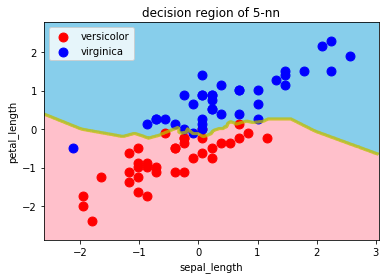

In [516]:
# 最近傍法
neigh5 = KNeighborsClassifier(n_neighbors=5)

# 学習
neigh5.fit(scaler_X_train, y_train)

# 推定
y_pred_KN = neigh5.predict(scaler_X_test)

# 評価
accuracy_score_KN = accuracy_score(y_test, y_pred_KN)
precision_score_KN = precision_score(y_test, y_pred_KN)
recall_score_KN = recall_score(y_test, y_pred_KN)
f1_score_KN = f1_score(y_test, y_pred_KN)

target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_KN = classification_report(y_test, y_pred_KN, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_KN = pd.DataFrame(cr_KN)
display(df_cr_KN)

# 可視化
decision_region(scaler_X_train, y_train, neigh5, title='decision region of 5-nn', xlabel='sepal_length', ylabel='petal_length')

## 【問題8】他の手法の学習

### ＜ロジスティック回帰＞

,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00


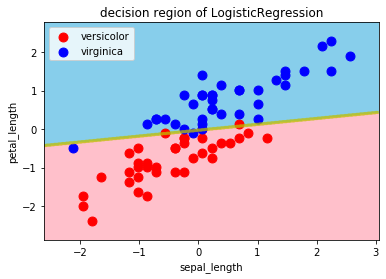

In [517]:
from sklearn.linear_model import LogisticRegression
# 学習
model_LR = LogisticRegression()
clf = model_LR.fit(scaler_X_train, y_train)

# 推定
y_pred_LR = model_LR.predict(scaler_X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_LR = classification_report(y_test, y_pred_LR, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_LR = pd.DataFrame(cr_LR)
display(df_cr_LR)

# 可視化
decision_region(scaler_X_train, y_train, clf, title='decision region of LogisticRegression', xlabel='sepal_length', ylabel='petal_length')

### ＜SVM：サポートベクトルマシーン＞

,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00


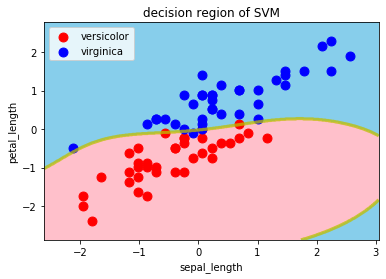

In [518]:
from sklearn.svm import SVC

# SVM
model_SVC = SVC()

# 学習
clf = model_SVC.fit(scaler_X_train, y_train)

# 推定
y_pred_SVM = model_SVC.predict(scaler_X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_SVN = classification_report(y_test, y_pred_SVM, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_SVN = pd.DataFrame(cr_SVN)
display(df_cr_SVN)

# 可視化
decision_region(scaler_X_train, y_train, clf, title='decision region of SVM', xlabel='sepal_length', ylabel='petal_length')

### ＜決定木＞

,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.916667,0.846154,0.88,0.88141,0.882821
recall,0.846154,0.916667,0.88,0.88141,0.880000
f1-score,0.880000,0.880000,0.88,0.88000,0.880000
support,13.000000,12.000000,0.88,25.00000,25.000000


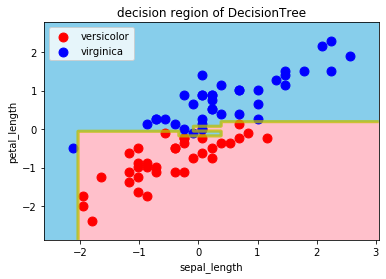

In [519]:
from sklearn.tree import DecisionTreeClassifier
# 決定木
model_DT = DecisionTreeClassifier()

# 学習
clf = model_DT.fit(scaler_X_train, y_train)

# 推定
y_pred_DT = model_DT.predict(scaler_X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_DT = classification_report(y_test, y_pred_DT, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_DT = pd.DataFrame(cr_DT)
display(df_cr_DT)

# 可視化
decision_region(scaler_X_train, y_train, clf, title='decision region of DecisionTree', xlabel='sepal_length', ylabel='petal_length')

### ＜ランダムフォレスト＞

,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00


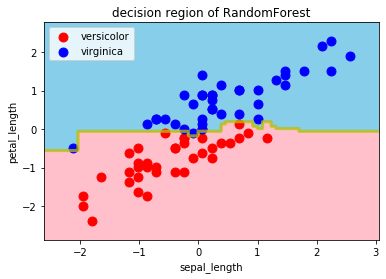

In [520]:
from sklearn.ensemble import RandomForestClassifier
# ランダムフォレスト
model_RF = RandomForestClassifier()
# 学習
clf = model_RF.fit(scaler_X_train, y_train)

# 推定
y_pred_RF = model_RF.predict(scaler_X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_RF = classification_report(y_test, y_pred_RF, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_RF = pd.DataFrame(cr_RF)
display(df_cr_RF)

# 可視化
decision_region(scaler_X_train, y_train, clf, title='decision region of RandomForest', xlabel='sepal_length', ylabel='petal_length')

### 各手法をまとめると

<table>
	<tr>
		<td rowspan="2"></td>
		<td colspan="2">最近傍法</td>
		<td colspan="2">ロジスティック回帰</td>
		<td colspan="2">SVM</td>
		<td colspan="2">決定木</td>
		<td colspan="2">ランダムフォレスト</td>
		<td></td>
	</tr>
	<tr>
		<td>versicolor</td>
		<td>virginica</td>
		<td>versicolor</td>
		<td>virginica</td>
		<td>versicolor</td>
		<td>virginica</td>
		<td>versicolor</td>
		<td>virginica</td>
		<td>versicolor</td>
		<td>virginica</td>
	</tr>
	<tr>
		<td>accuracy</td>
		<td colspan="2">0.9200</td>
		<td colspan="2">0.9200</td>
		<td colspan="2">0.9200</td>
		<td colspan="2">0.8800</td>
		<td colspan="2">0.9200</td>
	</tr>
	<tr>
		<td>precision</td>
		<td>0.9231</td>
		<td>0.9167</td>
		<td>0.9231</td>
		<td>0.9167</td>
		<td>0.9231</td>
		<td>0.9167</td>
		<td>0.9167</td>
		<td>0.8462</td>
		<td>0.9231</td>
		<td>0.9167</td>
	</tr>
	<tr>
		<td><left>recall</left></td>
		<td>0.9231</td>
		<td>0.9167</td>
		<td>0.9231</td>
		<td>0.9167</td>
		<td>0.9231</td>
		<td>0.9167</td>
		<td>0.8462</td>
		<td>0.9167</td>
		<td>0.9231</td>
		<td>0.9167</td>
	</tr>
	<tr>
		<td>f1-score</td>
		<td>0.9231</td>
		<td>0.9167</td>
		<td>0.9231</td>
		<td>0.9167</td>
		<td>0.9231</td>
		<td>0.9167</td>
		<td>0.8800</td>
		<td>0.8800</td>
		<td>0.9231</td>
		<td>0.9167</td>
	</tr>
	<tr>
		<td>support</td>
		<td>13</td>
		<td>12</td>
		<td>13</td>
		<td>12</td>
		<td>13</td>
		<td>12</td>
		<td>13</td>
		<td>12</td>
		<td>13</td>
		<td>12</td>
	</tr>
</table>


f1-scoreで比較するとversicolorの決定木が一番高い精度を示している。  
（尚、オプションのパラメータはすべてデフォルトとした。最適なパラメータを指定することによりより精度は上がると考えられる）  

＜決定領域について＞  
・最近傍法：境界付近で曲線的に分割されているが、左端のvirginicaが外れ値となってしまっている。  
・ロジスティック回帰：versicolorとvirginicaの境界付近で直線的に分割されているため、最近傍法と同じく、左端のvirginicaが外れ値となってしまっている。  
・SVM：境界付近で曲線状に分割されており、外れ値もほぼ無い。  
・決定木：境界付近で階段状に分割されている。、外れ値もほぼ無い。自然現象でこのような階段状に分布が変わるのはほぼ無い。  
・ランダムフォレスト：決定木と同様に階段状に分割されているが、外れ値となる左端のvirginicaに過剰反応し、境界面がおかしなことになっている。自然現象でこのような分布になるのはありえない。  

## 【問題9】（アドバンス課題）標準化の有無の比較

### ＜最近傍法＞

In [521]:
# 最近傍法
neigh5 = KNeighborsClassifier(n_neighbors=5)
ss_neigh5 = KNeighborsClassifier(n_neighbors=5)

# 学習
neigh5.fit(X_train, y_train)
ss_neigh5.fit(scaler_X_train, y_train)

# 推定
y_pred_KN = neigh5.predict(X_test)
ss_y_pred_KN = ss_neigh5.predict(scaler_X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_KN = classification_report(y_test, y_pred_KN, target_names = target_names, output_dict=True)
ss_cr_KN = classification_report(y_test, ss_y_pred_KN, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_KN = pd.DataFrame(cr_KN)
df_cr_KN
print("標準化なし")
display(df_cr_KN)

# pandas.DataFrameへ変換
df_ss_cr_KN = pd.DataFrame(ss_cr_KN)
print("")
print("標準化あり")
display(df_ss_cr_KN)

標準化なし


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00



標準化あり


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00


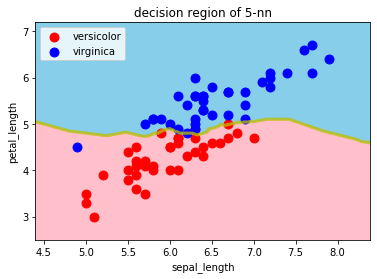

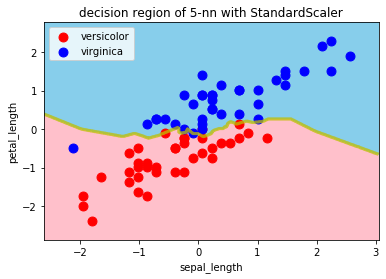

In [522]:
# 可視化
decision_region(X_train, y_train, neigh5, title='decision region of 5-nn', xlabel='sepal_length', ylabel='petal_length')
decision_region(scaler_X_train, y_train, ss_neigh5, title='decision region of 5-nn with StandardScaler', xlabel='sepal_length', ylabel='petal_length')

### ＜ロジスティック回帰＞

In [523]:
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰
model_LR = LogisticRegression()
ss_model_LR = LogisticRegression()

# 学習
clf = model_LR.fit(X_train, y_train)
ss_clf = ss_model_LR.fit(scaler_X_train, y_train)

# 推定
y_pred_LR = model_LR.predict(X_test)
ss_y_pred_LR = ss_model_LR.predict(scaler_X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_LR = classification_report(y_test, y_pred_LR, target_names = target_names, output_dict=True)
ss_cr_LR = classification_report(y_test, ss_y_pred_LR, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_LR = pd.DataFrame(cr_LR)
print("標準化なし")
display(df_cr_LR)

# pandas.DataFrameへ変換
df_cr_LR = pd.DataFrame(ss_cr_LR)
print("")
print("標準化あり")
display(df_cr_LR)

標準化なし


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00



標準化あり


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00


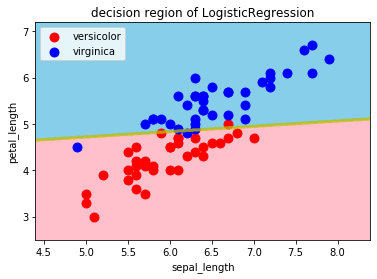

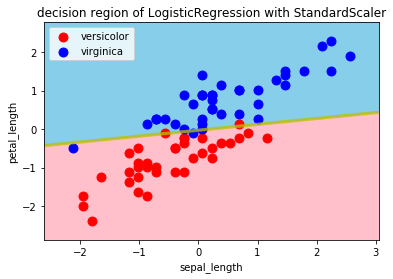

In [524]:
# 可視化
decision_region(X_train, y_train, clf, title='decision region of LogisticRegression', xlabel='sepal_length', ylabel='petal_length')
decision_region(scaler_X_train, y_train, ss_clf, title='decision region of LogisticRegression with StandardScaler', xlabel='sepal_length', ylabel='petal_length')

### ＜SVM：サポートベクトルマシーン＞

In [525]:
from sklearn.svm import SVC

# SVM
model_SVC = SVC()
ss_model_SVC = SVC()

# 学習
clf = model_SVC.fit(X_train, y_train)
ss_clf = ss_model_SVC.fit(scaler_X_train, y_train)

# 推定
y_pred_SVM = model_SVC.predict(X_test)
ss_y_pred_SVM = ss_model_SVC.predict(scaler_X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_SVN = classification_report(y_test, y_pred_SVM, target_names = target_names, output_dict=True)
ss_cr_SVN = classification_report(y_test, ss_y_pred_SVM, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_SVN = pd.DataFrame(cr_SVN)
print("標準化なし")
display(df_cr_SVN)

# pandas.DataFrameへ変換
df_ss_cr_SVN = pd.DataFrame(ss_cr_SVN)
print("")
print("標準化あり")
display(df_ss_cr_SVN)

標準化なし


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00



標準化あり


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00


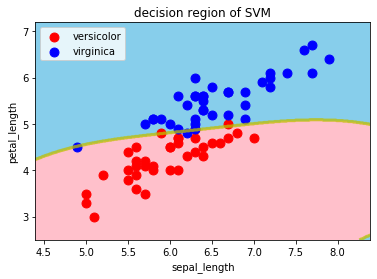

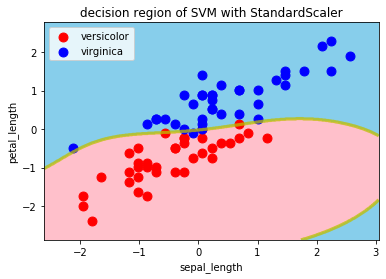

In [526]:
# 可視化
decision_region(X_train, y_train, clf, title='decision region of SVM', xlabel='sepal_length', ylabel='petal_length')
decision_region(scaler_X_train, y_train, ss_clf, title='decision region of SVM with StandardScaler', xlabel='sepal_length', ylabel='petal_length')

### ＜決定木＞

In [527]:
from sklearn.tree import DecisionTreeClassifier
# 決定木
model_DT = DecisionTreeClassifier()
ss_model_DT = DecisionTreeClassifier()

# 学習
clf = model_DT.fit(X_train, y_train)
ss_clf = ss_model_DT.fit(scaler_X_train, y_train)

# 推定
y_pred_DT = model_DT.predict(X_test)
ss_y_pred_DT = ss_model_DT.predict(scaler_X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_DT = classification_report(y_test, y_pred_DT, target_names = target_names, output_dict=True)
ss_cr_DT = classification_report(y_test, ss_y_pred_DT, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_DT = pd.DataFrame(cr_DT)
print("標準化なし")
display(df_cr_DT)

# pandas.DataFrameへ変換
df_ss_cr_DT = pd.DataFrame(ss_cr_DT)
print("")
print("標準化あり")
display(df_ss_cr_DT)

標準化なし


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.916667,0.846154,0.88,0.88141,0.882821
recall,0.846154,0.916667,0.88,0.88141,0.880000
f1-score,0.880000,0.880000,0.88,0.88000,0.880000
support,13.000000,12.000000,0.88,25.00000,25.000000



標準化あり


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.916667,0.846154,0.88,0.88141,0.882821
recall,0.846154,0.916667,0.88,0.88141,0.880000
f1-score,0.880000,0.880000,0.88,0.88000,0.880000
support,13.000000,12.000000,0.88,25.00000,25.000000


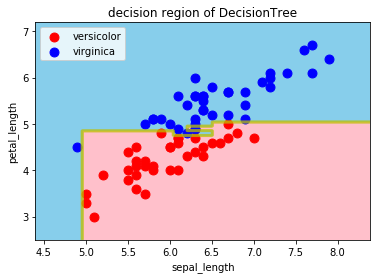

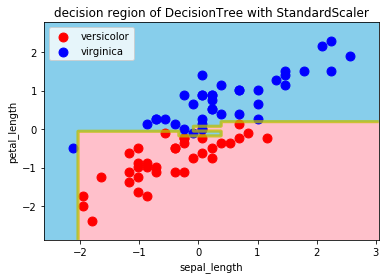

In [528]:
# 可視化
decision_region(X_train, y_train, clf, title='decision region of DecisionTree', xlabel='sepal_length', ylabel='petal_length')
decision_region(scaler_X_train, y_train, ss_clf, title='decision region of DecisionTree with StandardScaler', xlabel='sepal_length', ylabel='petal_length')

### ＜ランダムフォレスト＞

In [529]:
from sklearn.ensemble import RandomForestClassifier
# ランダムフォレスト
model_RF = RandomForestClassifier()
ss_model_RF = RandomForestClassifier()

# 学習
clf = model_RF.fit(X_train, y_train)
ss_clf = ss_model_RF.fit(scaler_X_train, y_train)

# 推定
y_pred_RF = model_RF.predict(X_test)
ss_y_pred_RF = ss_model_RF.predict(scaler_X_test)

# 評価
target_names = [iris_data.target_names[1], iris_data.target_names[2]]
cr_RF = classification_report(y_test, y_pred_RF, target_names = target_names, output_dict=True)
ss_cr_RF = classification_report(y_test, ss_y_pred_RF, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_RF = pd.DataFrame(cr_RF)
print("標準化なし")
display(df_cr_RF)

# pandas.DataFrameへ変換
df_ss_cr_RF = pd.DataFrame(ss_cr_RF)
print("")
print("標準化あり")
display(df_ss_cr_RF)

標準化なし


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.916667,0.846154,0.88,0.88141,0.882821
recall,0.846154,0.916667,0.88,0.88141,0.880000
f1-score,0.880000,0.880000,0.88,0.88000,0.880000
support,13.000000,12.000000,0.88,25.00000,25.000000



標準化あり


,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.923077,0.916667,0.92,0.919872,0.92
recall,0.923077,0.916667,0.92,0.919872,0.92
f1-score,0.923077,0.916667,0.92,0.919872,0.92
support,13.000000,12.000000,0.92,25.000000,25.00


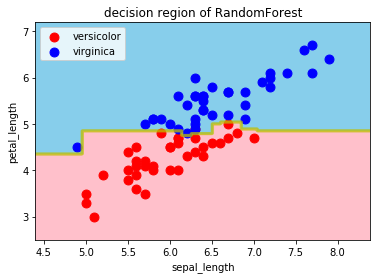

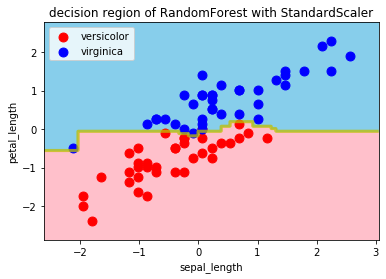

In [530]:
# 可視化
decision_region(X_train, y_train, clf, title='decision region of RandomForest', xlabel='sepal_length', ylabel='petal_length')
decision_region(scaler_X_train, y_train, ss_clf, title='decision region of RandomForest with StandardScaler', xlabel='sepal_length', ylabel='petal_length')

以上の結果から標準化によって、特徴量の平均が0、分散が１になるようにプロットが平行移動されたものとなる。  
今回の結果では、デフォルトオプションを使ったためか、標準化前と標準化後の精度はほとんど変わらない。  


## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法

テストデータが38件と少ないので、学習済みの訓練データに対しても、決定領域を表示し比較する。

In [533]:
iris_data = df.loc[:,["sepal_length","petal_length","species"]]
iris_data

# ndarrayへ変換
iris_X = np.array(iris_data.iloc[:,0:2])
iris_y = np.array(iris_data.iloc[:,2])

# 分割
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.25)

# 標準化
ss = StandardScaler()
ss.fit(X_train)
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)



In [534]:
X_test.shape

(38, 2)

In [535]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def many_decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, n)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green','red', 'blue']
    contourf_color = ['lime','pink', 'skyblue']
    n_class = 3
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    

In [536]:
target_names = ["setosa", "versicolor", "virginica "]

### ＜最近傍法＞

テストデータ


,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.846154,1.000000,0.947368,0.948718,0.955466
recall,1.0,1.000000,0.833333,0.947368,0.944444,0.947368
f1-score,1.0,0.916667,0.909091,0.947368,0.941919,0.947169
support,15.0,11.000000,12.000000,0.947368,38.000000,38.000000


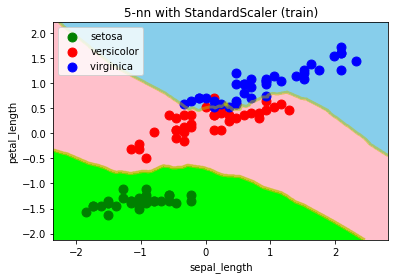

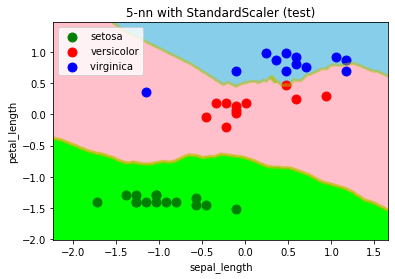

In [547]:
# 最近傍法
ss_neigh5 = KNeighborsClassifier(n_neighbors=5)

# 学習
ss_clf = ss_neigh5.fit(ss_X_train, y_train)

# 推定
ss_y_pred_KN_test = ss_neigh5.predict(ss_X_test)

# 評価
ss_cr_KN_test = classification_report(y_test, ss_y_pred_KN_test, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_ss_cr_KN_test = pd.DataFrame(ss_cr_KN_test)
print("テストデータ")
display(df_ss_cr_KN_test)

# 可視化
many_decision_region(ss_X_train, y_train, ss_clf, title='5-nn with StandardScaler (train)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)
many_decision_region(ss_X_test, y_test, ss_clf, title='5-nn with StandardScaler (test)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)

setosaは100％分類可能

### ＜ロジスティック回帰＞

テストデータ


,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.916667,1.000000,0.973684,0.972222,0.975877
recall,1.0,1.000000,0.916667,0.973684,0.972222,0.973684
f1-score,1.0,0.956522,0.956522,0.973684,0.971014,0.973684
support,15.0,11.000000,12.000000,0.973684,38.000000,38.000000


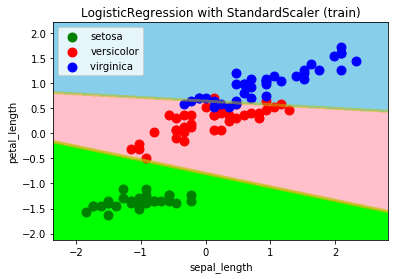

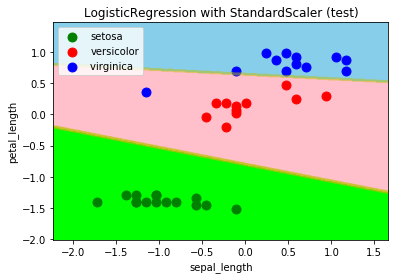

In [548]:
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰
ss_model_LR = LogisticRegression()

# 学習
ss_clf = ss_model_LR.fit(ss_X_train, y_train)

# 推定
ss_y_pred_LR_test = ss_model_LR.predict(ss_X_test)

# 評価
ss_cr_LR_test = classification_report(y_test, ss_y_pred_LR_test, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_cr_LR_test = pd.DataFrame(ss_cr_LR_test)
print("テストデータ")
display(df_cr_LR_test)

# 可視化
many_decision_region(ss_X_train, y_train, ss_clf, title='LogisticRegression with StandardScaler (train)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)
many_decision_region(ss_X_test, y_test, ss_clf, title='LogisticRegression with StandardScaler (test)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)

setosaは１００％分類可能

### ＜SVM：サポートベクトルマシーン＞

テストデータ


,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.846154,1.000000,0.947368,0.948718,0.955466
recall,1.0,1.000000,0.833333,0.947368,0.944444,0.947368
f1-score,1.0,0.916667,0.909091,0.947368,0.941919,0.947169
support,15.0,11.000000,12.000000,0.947368,38.000000,38.000000


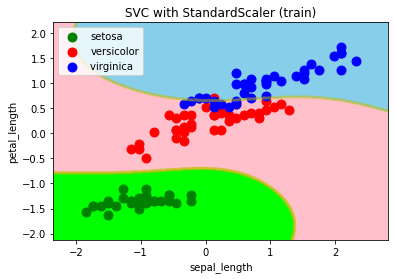

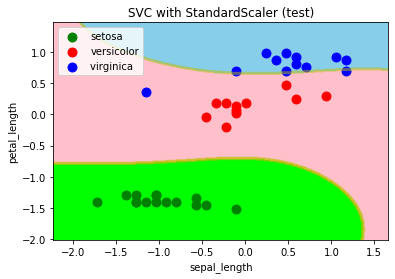

In [549]:
# SVM
ss_model_SVC = SVC()

# 学習
ss_clf = ss_model_SVC.fit(ss_X_train, y_train)

# 推定
ss_y_pred_SVM_test = ss_model_SVC.predict(ss_X_test)

# 評価
ss_cr_SVN_test = classification_report(y_test, ss_y_pred_SVM_test, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_ss_cr_SVN_test = pd.DataFrame(ss_cr_SVN_test)
print("テストデータ")
display(df_ss_cr_SVN_test)

# 可視化
many_decision_region(ss_X_train, y_train, ss_clf, title='SVC with StandardScaler (train)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)
many_decision_region(ss_X_test, y_test, ss_clf, title='SVC with StandardScaler (test)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)

setosaは１００％分類可能

### ＜決定木＞

テストデータ


,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.846154,1.000000,0.947368,0.948718,0.955466
recall,1.0,1.000000,0.833333,0.947368,0.944444,0.947368
f1-score,1.0,0.916667,0.909091,0.947368,0.941919,0.947169
support,15.0,11.000000,12.000000,0.947368,38.000000,38.000000


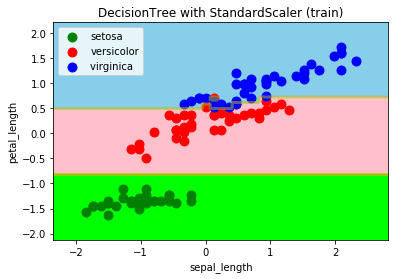

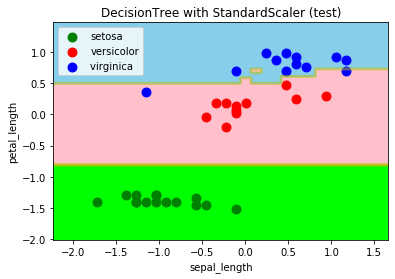

In [550]:
# 決定木
ss_model_DT = DecisionTreeClassifier()

# 学習
ss_clf = ss_model_DT.fit(ss_X_train, y_train)

# 推定
ss_y_pred_DT_test = ss_model_DT.predict(ss_X_test)

# 評価
ss_cr_DT_test = classification_report(y_test, ss_y_pred_DT_test, target_names = target_names, output_dict=True)

# pandas.DataFrameへ変換
df_ss_cr_DT_test = pd.DataFrame(ss_cr_DT_test)
print("テストデータ")
display(df_ss_cr_DT_test)

# 可視化
many_decision_region(ss_X_train, y_train, ss_clf, title='DecisionTree with StandardScaler (train)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)
many_decision_region(ss_X_test, y_test, ss_clf, title='DecisionTree with StandardScaler (test)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)

setosaは１００％分類可能

### ＜ランダムフォレスト＞

テストデータ


,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.916667,1.000000,0.973684,0.972222,0.975877
recall,1.0,1.000000,0.916667,0.973684,0.972222,0.973684
f1-score,1.0,0.956522,0.956522,0.973684,0.971014,0.973684
support,15.0,11.000000,12.000000,0.973684,38.000000,38.000000


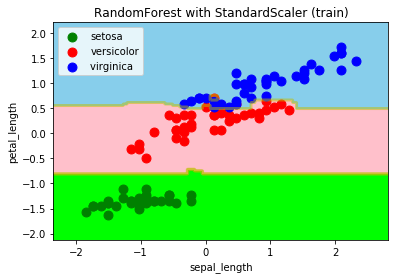

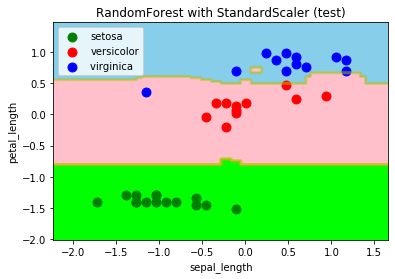

In [551]:
# ランダムフォレスト
ss_model_RF = RandomForestClassifier()

# 学習
ss_clf = ss_model_RF.fit(ss_X_train, y_train)

# 推定
ss_y_pred_RF_test = ss_model_RF.predict(ss_X_test)

# 評価
ss_cr_RF_test = classification_report(y_test, ss_y_pred_RF_test, target_names = target_names, output_dict=True)


# pandas.DataFrameへ変換
df_ss_cr_RF_test = pd.DataFrame(ss_cr_RF_test)
print("テストデータ")
display(df_ss_cr_RF_test)


# 可視化
many_decision_region(ss_X_train, y_train, ss_clf, title='RandomForest with StandardScaler (train)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)
many_decision_region(ss_X_test, y_test, ss_clf, title='RandomForest with StandardScaler (test)', xlabel='sepal_length', ylabel='petal_length', target_names = target_names)

setosaは１００％分類可能

### ＜まとめ＞

<table>
	<tr>
		<td rowspan="2"></td>
		<td colspan="3"><center>最近傍法</center></td>
		<td colspan="3"><center>ロジスティック回帰</center></td>
		<td colspan="3"><center>SVM</center></td>
		<td colspan="3"><center>決定木</center></td>
		<td colspan="3"><center>ランダムフォレスト</center></td>
	</tr>
	<tr>
		<td>setosa</td>
		<td>versicolor</td>
		<td>virginica</td>
		<td>setosa</td>
		<td>versicolor</td>
		<td>virginica</td>
		<td>setosa</td>
		<td>versicolor</td>
		<td>virginica</td>
		<td>setosa</td>
		<td>versicolor</td>
		<td>virginica</td>
		<td>setosa</td>
		<td>versicolor</td>
		<td>virginica</td>
	</tr>
	<tr>
		<td>accuracy</td>
		<td colspan="3"><center>0.9474</center></td>
		<td colspan="3"><center>0.9737</center></td>
		<td colspan="3"><center>0.9474</center></td>
		<td colspan="3"><center>0.9474</center></td>
		<td colspan="3"><center>0.9474</center></td>
	</tr>
	<tr>
		<td>precision</td>
		<td>1.0000</td>
		<td>0.8462</td>
		<td>1.0000</td>
		<td>1.0000</td>
		<td>0.9167</td>
		<td>1.0000</td>
		<td>1.0000</td>
		<td>0.8462</td>
		<td>1.0000</td>
		<td>1.0000</td>
		<td>0.8462</td>
		<td>1.0000</td>
		<td>1.0000</td>
		<td>0.9167</td>
		<td>1.0000</td>
	</tr>
	<tr>
		<td>recall</td>
		<td>1.0000</td>
		<td>1.0000</td>
		<td>0.8333</td>
		<td>1.0000</td>
		<td>1.0000</td>
		<td>0.9167</td>
		<td>1.0000</td>
		<td>1.0000</td>
		<td>0.8333</td>
		<td>1.0000</td>
		<td>1.0000</td>
		<td>0.8333</td>
		<td>1.0000</td>
		<td>1.0000</td>
		<td>0.9167</td>
	</tr>
	<tr>
		<td>f1-score</td>
		<td>1.0000</td>
		<td>0.9167</td>
		<td>0.9091</td>
		<td>1.0000</td>
		<td>0.9565</td>
		<td>0.9565</td>
		<td>1.0000</td>
		<td>0.9167</td>
		<td>0.9091</td>
		<td>1.0000</td>
		<td>0.9167</td>
		<td>0.9091</td>
		<td>1.0000</td>
		<td>0.9565</td>
		<td>0.9565</td>
	</tr>
</table>


上の表からsetosaは、すべての分類手法でも１００％分類可能。  
残る品種をf1-scoreで比較すると、  
versicolorはロジスティック回帰とランダムフォレストが精度が高い。  
virginicaも同様に、ロジスティック回帰とランダムフォレストが精度が高い。  
本データでは、ロジスティック回帰とランダムフォレストが同様の精度となったが、  
ロジスティック回帰では直線的な分類となるので、表現力としてはランダムフォレストの方が精度が高いと考えられる。